<a href="https://colab.research.google.com/github/solharsh/ML_Repository_University_Of_Chicago_PGD/blob/master/Assignment3_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

In 1912, the British passenger ship Titanic struck an iceberg, which led to the death of over 1,500 passengers and crew, more than half the people on board.

You want to construct a model with Logistic Regression that uses available data about the passengers to predict their survival.

Use this dataset: titanic_dataset.csv (more information about this dataset is available on Kaggle (Links to an external site.)--however, ignore the other datasets there)

First, drop columns from the dataset that are obviously unnecessary for your model.
Then, assign the dataset's median Age to rows where the age data is missing.
Then, split the dataset into a training set and test set.
Fit your initial model, and identify and remove from consideration predictors that are not significant.
Plot a ROC curve and find the optimal cutoff probability
Update your predictions using the optimal cutoff
Finally, create a confusion matrix using your final predictions
 

Document your work and explain your decision making as you build your model.

Question:
1. First, drop columns from the dataset that are obviously unnecessary for your model.
2. Then, assign the dataset's median Age to rows where the age data is missing.
3. Then, split the dataset into a training set and test set.
4. Fit your initial model, and identify and remove from consideration predictors that are not significant.
5. Plot a ROC curve and find the optimal cutoff probability
6. Update your predictions using the optimal cutoff
7. Finally, create a confusion matrix using your final predictions



Strategising the Question:

Let's divide the process in 3 Parts :

A. Data Preparation

B. Model Fitting

C. Improving Accuracy






importing all important libraries for Statsmodels and Scikit-Learn:


In [0]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import statsmodels.api as sm 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
titanic_df = pd.read_csv("/content/drive/My Drive/UC Machine Learning/Datasets/titanic_dataset.csv") #Reading the CSV file and creating dataframe


In [0]:
titanic_df.head(10) #observe the NaN values, especially for Age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:

- Survived: Outcome of survival (0 = No; 1 = Yes)
- Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- Name: Name of passenger
- Sex: Sex of the passenger
- Age: Age of the passenger (Some entries contain NaN)
- SibSp: Number of siblings and spouses of the passenger aboard
- Parch: Number of parents and children of the passenger aboard
- Ticket: Ticket number of the passenger
- Fare: Fare paid by the passenger
- Cabin Cabin number of the passenger (Some entries contain NaN)
- Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Understanding Variables those are obviously not required to predict the survival:
- 1.Passenger ID: Just a randon number
- 2.Name: Name has no significance with respect to getting survived
- 3.Ticket: A random number
- 4.Cabin: Cabin number does not add any significance in getting rescued. Moreover, this predictor is apprx. 70% sparse. 

I'm going forward with Embarked field which has 2 empty entries.

In [0]:
titanic_new_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1) #dropping the fields mentioned above

In [0]:
titanic_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [0]:
titanic_new_df.head(10) #observe the 6th record with NaN under Age column

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [0]:
titanic_new_df['Age'].median() # Calculating the Median (Though this step was not needed, I was curious)

28.0

In [0]:
titanic_new_df['Age'].fillna((titanic_new_df['Age'].median()), inplace=True) #To fill the NaN values under Age with Median

In [0]:
titanic_new_df.head(10) #observe the Age taking median values where it was NaN earlier

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [0]:
titanic_new_df.info() #checking if there are no missing values, except for those in Embarked column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [0]:
titanic_new2_df = pd.get_dummies(titanic_new_df, columns=['Sex', 'Embarked'])

In [0]:
titanic_new2_df.head(7)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,0,3,28.0,0,0,8.4583,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,0,1,0,0,1


Uptill now, we have imported the Titanic dataset and have replaced NaN values under 'Age' with the Median values. We have also dropped few fields like 'Name', 'PassengerID', 'Ticket', 'Cabin' which had so real significance in dictating survival of a person. We have also one-hot encoded the Gender and Embarked predictors.


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(titanic_new2_df.drop("Survived", axis=1), titanic_new2_df['Survived'], test_size = 0.2,\
random_state=44) #taking 'Survived' as the Output/Target variable

In [0]:
X_test.shape 

(179, 10)

In [0]:
logit = LogisticRegression() #creating a Logistic Regression model'Logit'

In [0]:
logit.fit(X_train, Y_train) #fitting the model

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logit.classes_

array([0, 1])

In [0]:
logit.coef_

array([[-1.20642981e+00, -3.95584837e-02, -2.28868212e-01,
        -3.30241484e-02,  1.69493511e-03,  2.34709432e+00,
        -4.10660404e-01,  6.50017133e-01,  9.41595347e-01,
         3.44821439e-01]])

In [0]:
logit.predict(X_test) 

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1])

In [0]:
logit.score(X_test, Y_test) #this shows the mean accuracy in the predictions. 

0.7318435754189944

Uptill now, we have split the entire dataset into Test and Train at 20 - 80%. We've also selected and dropped 'Survival' as the output/ target variable. We've created a logistic Regression model and fed it with Train dataset. We've then predicted the survival percentage of the Test dataset; which is 74.86%. This infers, the model can predict 74.86 times correctly out of 100 chances, given all the predictors values.


In [0]:
#Now deep diving with Statsmodel
X_train = sm.add_constant(X_train)

In [0]:
Y_train.head()

62     0
847    0
511    0
187    1
833    0
Name: Survived, dtype: int64

In [0]:
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())

In [0]:
result = logit.fit()

In [0]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -297.09
Date:                Wed, 06 May 2020   Deviance:                       594.18
Time:                        00:28:33   Pearson chi2:                     735.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3599      0.336      7.031      0.0

Interpretation:

P Values:

Values larger than 0.05 results to less dependency on the target variable. For instance, Parch, Fare, Sex_Male significantly exceed the limit and have less effect on Survival as compared to the other variables

In [0]:
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            612.1810  
Link Function:      logit            BIC:            -4023.1777
Dependent Variable: Survived         Log-Likelihood: -297.09   
Date:               2020-05-06 00:28 LL-Null:        -472.04   
No. Observations:   712              Deviance:       594.18    
Df Model:           8                Pearson chi2:   735.      
Df Residuals:       703              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const        2.3599    0.3356   7.0310  0.0000   1.7020   3.0177
Pclass      -1.2969    0.1697  -7.6435  0.0000  -1.6295  -0.9643
Age         -0.0435    0.0092  -4.7510  0.0000  -0.0615  -0.0256
SibSp       -0.2397    0.1249  -1.9184  0.0551  -

Interpretation:

AIC : Its a measure of quality of model with respect to the predictors fitted. The lower number infers a better model (comparative). In this particular example, we can see AIC reducing as we remove less significant predictors.

BIC : Similar to AIC, BIC is a measure to select the best performing model. Lower BIC is a good performing model.

AIC is better in situations when a false negative finding would be considered more misleading than a false positive, and BIC is better in situations where a false positive is as misleading as, or more misleading than, a false negative.

reference: https://www.methodology.psu.edu/resources/AIC-vs-BIC/


In [0]:
result.params

const         2.359868
Pclass       -1.296899
Age          -0.043517
SibSp        -0.239701
Parch        -0.019564
Fare          0.000972
Sex_female    2.607540
Sex_male     -0.247672
Embarked_C    0.776218
Embarked_Q    1.110299
Embarked_S    0.473351
dtype: float64

Interpretation:

coefficients:

1.Age: With every unit increase in Age (say an year), the log odds of Survival decreases by 0.0435

2.Female: With every one increase in the female population, the log odds of survival increases by 2.607 times

3.Male : With every one increase in the male population, the log odds of survival decreases by 0.2477 times

Here '-ve' corrosponds to decrease and '+ve' corrosponds to increase

In [0]:
np.exp(result.params)

const         10.589551
Pclass         0.273378
Age            0.957416
SibSp          0.786863
Parch          0.980626
Fare           1.000972
Sex_female    13.565632
Sex_male       0.780616
Embarked_C     2.173237
Embarked_Q     3.035267
Embarked_S     1.605364
dtype: float64

Instead of using Log odds, we can use exponential function to ease the understanding. Below are a few examples:

1.With each increase in female in the ship, the chances of survival increases by 13.5 times

2.with one increase in boarding from Queenstown, the survival chances increases by 3.03 times

In [0]:
result.deviance

594.1810307705837

Deviance is a measure of goodness of fit of a model. Larger the number, the bad fit it is. This measure is critical when we are choosing between different models.

In [0]:
result.aic

612.1810307705837



AIC is also a comparative parameter which gives the meseaure of goodness of fit for different models. AIC also helps us to know how a model performs while taking a subset of predictors. This will be demonstrated below:






Now, looking from the P values, we can observe Parch, Fare, Sex_male have lesser significance to surivial. Hence, dropping them one by one.


In [0]:
X_train.drop("Parch", axis=1, inplace=True)


In [0]:
print(sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit().summary2()) #observe how the AIC, BIC further decreased

               Results: Generalized linear model
Model:              GLM              AIC:            610.2021  
Link Function:      logit            BIC:            -4029.7248
Dependent Variable: Survived         Log-Likelihood: -297.10   
Date:               2020-05-06 00:30 LL-Null:        -472.04   
No. Observations:   712              Deviance:       594.20    
Df Model:           7                Pearson chi2:   736.      
Df Residuals:       704              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const        2.3613    0.3353   7.0415  0.0000   1.7040   3.0185
Pclass      -1.2998    0.1684  -7.7175  0.0000  -1.6299  -0.9697
Age         -0.0435    0.0092  -4.7499  0.0000  -0.0614  -0.0255
SibSp       -0.2442    0.1212  -2.0141  0.0440  -

In [0]:
X_train.drop("Fare", axis=1, inplace=True)

In [0]:
print(sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit().summary2()) #observe how the AIC, BIC further decreased

               Results: Generalized linear model
Model:              GLM              AIC:            608.3097  
Link Function:      logit            BIC:            -4036.1853
Dependent Variable: Survived         Log-Likelihood: -297.15   
Date:               2020-05-06 00:30 LL-Null:        -472.04   
No. Observations:   712              Deviance:       594.31    
Df Model:           6                Pearson chi2:   736.      
Df Residuals:       705              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const        2.4095    0.3013   7.9977  0.0000   1.8190   3.0000
Pclass      -1.3258    0.1485  -8.9265  0.0000  -1.6169  -1.0347
Age         -0.0436    0.0091  -4.7698  0.0000  -0.0615  -0.0257
SibSp       -0.2348    0.1175  -1.9983  0.0457  -

In [0]:
X_train.drop("Sex_male", axis=1, inplace=True)

In [0]:
print(sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit().summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            608.3097  
Link Function:      logit            BIC:            -4036.1853
Dependent Variable: Survived         Log-Likelihood: -297.15   
Date:               2020-05-06 00:30 LL-Null:        -472.04   
No. Observations:   712              Deviance:       594.31    
Df Model:           6                Pearson chi2:   736.      
Df Residuals:       705              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const        2.2432    0.4010   5.5944  0.0000   1.4573   3.0291
Pclass      -1.3258    0.1485  -8.9265  0.0000  -1.6169  -1.0347
Age         -0.0436    0.0091  -4.7698  0.0000  -0.0615  -0.0257
SibSp       -0.2348    0.1175  -1.9983  0.0457  -

In [0]:
result = sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()

In [0]:
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            608.3097  
Link Function:      logit            BIC:            -4036.1853
Dependent Variable: Survived         Log-Likelihood: -297.15   
Date:               2020-05-06 00:30 LL-Null:        -472.04   
No. Observations:   712              Deviance:       594.31    
Df Model:           6                Pearson chi2:   736.      
Df Residuals:       705              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const        2.2432    0.4010   5.5944  0.0000   1.4573   3.0291
Pclass      -1.3258    0.1485  -8.9265  0.0000  -1.6169  -1.0347
Age         -0.0436    0.0091  -4.7698  0.0000  -0.0615  -0.0257
SibSp       -0.2348    0.1175  -1.9983  0.0457  -

In [0]:
result.aic

608.3096636965981

Now, lets understand how the model has improved when we have dropped less significant predictors.

AIC: Initial AIC : 612.181 Final AIC; after dropping Parch, Fare, Sex_Male : 608.309 Therefore, it can be observed that the AIC has decreased when we considered the subset of predictors. Hence, the model is performing better than earlier.

BIC: Initial BIC:-4023.177 Final BIC; after dropping Parch, Fare, Sex_Male: -4036.185 Similar to AIC, BIC also had decreased and hence, the model is better performing with subset of predictors.

Now lets calculate the accuracy of prediction using these values:

In [0]:
X_test = sm.add_constant(X_test[['Pclass', 'Age', 'SibSp', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S']])

In [0]:
probabilities = result.predict(X_test)

In [0]:
probabilities.head()

117    0.185118
143    0.184122
748    0.569491
796    0.886901
853    0.970638
dtype: float64

In [0]:
predicted_classes = probabilities.map(lambda x: 'pos' if x > 0.5 else 'neg')

In [0]:
predicted_classes.head()

117    neg
143    neg
748    pos
796    pos
853    pos
dtype: object

In [0]:
predicted_classes = predicted_classes.map(lambda x: 1 if x == 'pos' else 0)

In [0]:
accuracy = sum(predicted_classes == Y_test) / len(Y_test)

Here we have tried finding all those records where predictions are true and divided it with number of predictions. The result is the accuracy.


In [0]:
accuracy

0.7318435754189944

Therefore, the accuracy of prediction obtained is 73.1%. In other words, my model on an average can predict 73.1 times correctly who can survive and who cannot out of 100 cases.

In the later part, lets try improving this accuracy.


In [0]:
confusion_mat = confusion_matrix(Y_test, predicted_classes) #construction of confusion matrix

In [0]:
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos']) #creating a dataframe with indexes

In [0]:
confusion_df

,Predicted neg,Predicted pos
Actual neg,81,25
Actual pos,23,50


We know that our Test data has 179 records. Hence total predictions made are on 179 people. Below are the interpretation of the matrix:

1.81 people were predicted to be un-survived and in actual they haven't survived. This is a good prediction as it meets the reality. 

2.23 people were predicted to be un-survived, but rather they survived. According to the model, this is a bad prediction

3.25 people were predicted to be survived and in reality, they couldn't survive. According to model, this is a bad prediction

4.50 people were predicted to be survived and they survived in reality. Which is great according to model. 

Here is a good way of understanding accuracy:

Prediction which meet the actual results counts to the success of the model. I.e, 81+50=131 times the model could predict correctly out of 179 times.

Therefore, accuracy = 131/179; which is 0.731 (as calculated earlier)

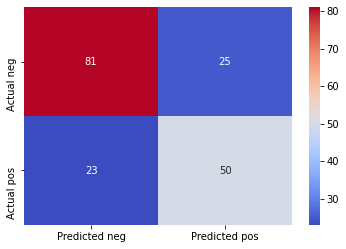

In [0]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

In [0]:
from sklearn.metrics import precision_score, recall_score
precision_score(Y_test, predicted_classes)

0.6666666666666666

In [0]:
recall_score(Y_test, predicted_classes)

0.684931506849315

Precision: number of true positives divided by the number of true positives plus the number of false positives. Therefore, the bigger the number, the better result it is.

In this case, it is 50/(50+25) = 0.666

Recall: number of true positives divided by the number of true positives plus the number of false negatives. Therefore, lower the number, better the result it is.

In this case, it is 50/(50+23) = 0.684

In [0]:
from sklearn.metrics import f1_score

f1_score(Y_test, predicted_classes)

0.6756756756756757

F1 Score: This measure sets the right balance between Precision and Recall. This is handy, especially when there is uneven class distribution (large number of actual negetives).

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score

probs = logit.predict_proba(X_test)[::,1]

AttributeError: ignored